In [1]:
%load_ext autoreload
%autoreload 2

# to enable imports from parent package
import sys
import os
from pathlib import Path
parent_dir = Path(os. getcwd()).parent.absolute()
sys.path.append(str(parent_dir))

import pandas as pd
import seaborn as sns
import numpy as np
import pickle
import os.path as osp
from plots import rename_col

import matplotlib
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
import matplotlib.pyplot as plt

plots_dir = 'output'

## MolHIV - budget 3, lr 0.01

3.0 0.01


/tmp/ipykernel_9974/2678296755.py:18: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  plot = sns.lineplot(x="step", y="delta_clean_target", hue="negative slope", data=df, palette=sns.color_palette(), err_style=None)


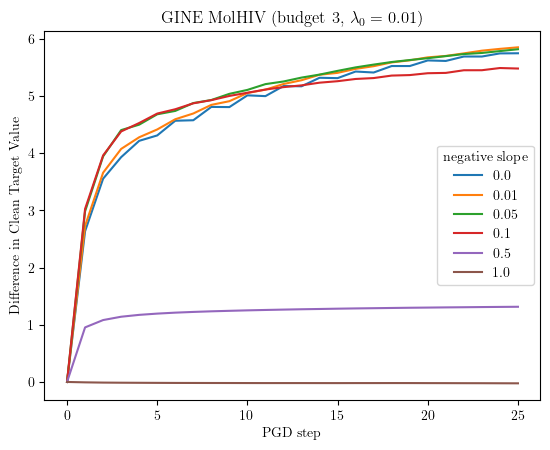

In [2]:
model_name = "GINE_ogbg-molhiv_300_5_0_20230726-081550"
directory = "negative_slope_MolHIV"

path = osp.join(directory, f"{model_name}.pickle")
with open(path, "rb") as f:
    recorder_df = pickle.load(f)

print(recorder_df["budget"].mean(), recorder_df["base_lr"].mean())

path = osp.join(directory, f"{model_name}_targets.pickle")
with open(path, "rb") as f:
    df = pickle.load(f)

df = df[(df["negative_slope"]==0) | (df["negative_slope"]>=0.01)]

df = rename_col(df, "negative_slope", "negative slope")

plot = sns.lineplot(x="step", y="delta_clean_target", hue="negative slope", data=df, palette=sns.color_palette(), err_style=None)
plt.title("GINE MolHIV (budget 3, $\lambda_0=0.01$)")
plt.xlabel('PGD step')
plt.ylabel('Difference in Clean Target Value')
plot.figure.savefig(osp.join(plots_dir, "neg_slope_GINE_MolHIV.pgf"), bbox_inches='tight')

## ZINC12k - budget 1, lr 0.01

1.0 0.01


/tmp/ipykernel_9974/549428184.py:16: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(x="step", y="delta_clean_target", hue="negative slope", data=df, palette=sns.color_palette(), err_style=None)


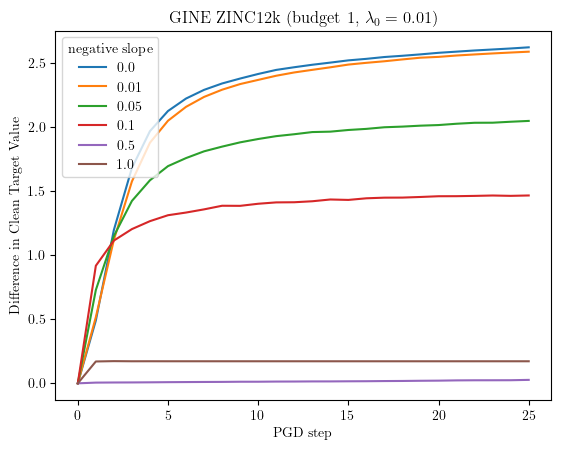

In [3]:
model_name = "GINE_ZINC12k_300_5_0_20230722-215952"
directory = "negative_slope_ZINClr0.01bud1"

path = osp.join(directory, f"{model_name}.pickle")
with open(path, "rb") as f:
    recorder_df = pickle.load(f)

print(recorder_df["budget"].mean(), recorder_df["base_lr"].mean())

path = osp.join(directory, f"{model_name}_targets.pickle")
with open(path, "rb") as f:
    df = pickle.load(f)

df = rename_col(df, "negative_slope", "negative slope")

sns.lineplot(x="step", y="delta_clean_target", hue="negative slope", data=df, palette=sns.color_palette(), err_style=None)
plt.title("GINE ZINC12k (budget 1, $\lambda_0=0.01$)")
plt.xlabel('PGD step')
plt.ylabel('Difference in Clean Target Value')
plot.figure.savefig(osp.join(plots_dir, "neg_slope_GINE_ZINC12k.pgf"), bbox_inches='tight')

## ZINC12k - budget 3, lr 1

3.0 1.0


/tmp/ipykernel_26548/2165618445.py:18: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(x="PGD step", y="$\Delta$ clean target", hue="negative slope", data=df, palette=sns.color_palette())


Text(0.5, 1.0, 'GINE ZINC12k (budget 3, $\\lambda_0=1$)')

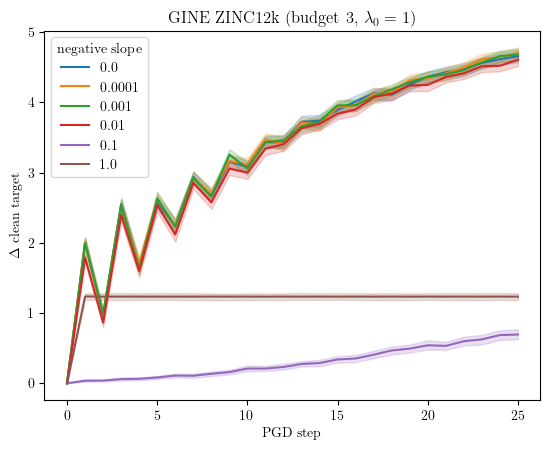

In [11]:
model_name = "GINE_ZINC12k_300_5_0_20230722-215952"
directory = "negative_slope_ZINClr1bud3"

path = osp.join(directory, f"{model_name}.pickle")
with open(path, "rb") as f:
    recorder_df = pickle.load(f)

print(recorder_df["budget"].mean(), recorder_df["base_lr"].mean())

path = osp.join(directory, f"{model_name}_targets.pickle")
with open(path, "rb") as f:
    df = pickle.load(f)

df = rename_col(df, "delta_clean_target", "$\Delta$ clean target")
df = rename_col(df, "negative_slope", "negative slope")
df = rename_col(df, "step", "PGD step")

sns.lineplot(x="PGD step", y="$\Delta$ clean target", hue="negative slope", data=df, palette=sns.color_palette())
plt.title("GINE ZINC12k (budget 3, $\lambda_0=1$)")